In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc
from scipy import stats

In [6]:
df=pd.read_csv("house_price.csv")

In [8]:
# Q1:EDA
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [12]:
print (df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [14]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [16]:
# Calculate 'price_per_sqft'
df['price_per_sqft']=df['price']/df['total_sqft']

In [18]:
df['price_per_sqft'].describe()

count    13200.000000
mean         0.079208
std          1.067272
min          0.002678
25%          0.042677
50%          0.054383
75%          0.073171
max        120.000000
Name: price_per_sqft, dtype: float64

In [ ]:
# Q2:Outlier Detection and Removal

In [20]:
# Outlier Detection Methods:
# a) Mean and Standard Deviation:
mean=df['price_per_sqft'].mean()

In [22]:
std=df['price_per_sqft'].std()

In [24]:
upper_limit=mean+3*std
lower_limit=mean-3*std
df_mean_std=df[(df['price_per_sqft']<upper_limit) & (df['price_per_sqft']>lower_limit)]

In [26]:
df_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,0.066898
13196,other,4 BHK,3600.0,5.0,400.00,4,0.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,0.052585
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,0.104073


In [28]:
# b) Percentile Method:
lower_percentile=df['price_per_sqft'].quantile(0.05)
upper_percentile=df['price_per_sqft'].quantile(0.95)
df_percentile=df[(df['price_per_sqft']>lower_percentile) & (df['price_per_sqft']<upper_percentile)]

In [30]:
df_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,0.065306
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,0.066898
13196,other,4 BHK,3600.0,5.0,400.00,4,0.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,0.052585


In [32]:
# c) IQR (Interquartile Range):
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1
lower_iqr=Q1-1.5*IQR
upper_iqr=Q3+1.5*IQR
df_iqr=df[(df['price_per_sqft']>lower_iqr)&(df['price_per_sqft']<upper_iqr)]

In [34]:
df_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,0.066898
13196,other,4 BHK,3600.0,5.0,400.00,4,0.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,0.052585
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,0.104073


In [36]:
# d) Z-Score:
z_score=np.abs(stats.zscore(df['price_per_sqft']))
df_zscore=df[z_score<3]

In [38]:
df_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,0.036998
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,0.046154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,0.043056
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,0.062459
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,0.042500
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,0.066898
13196,other,4 BHK,3600.0,5.0,400.00,4,0.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,0.052585
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,0.104073


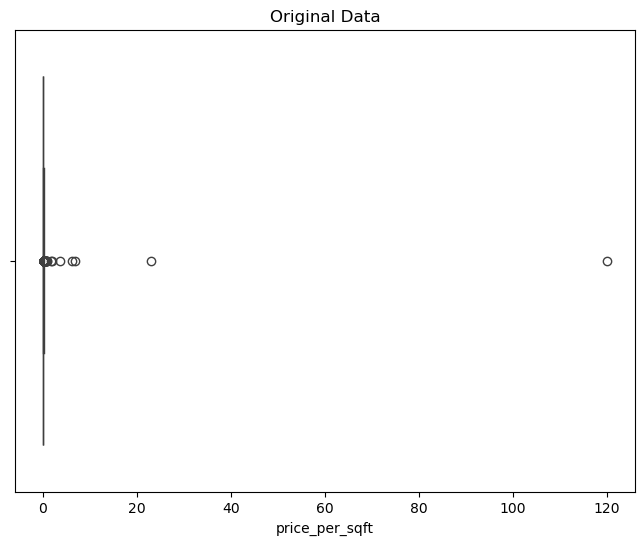

In [56]:
# Q3:box plot
# a)box plot of original data ((before outlier removal))
plt.figure(figsize=(8,6))
snc.boxplot(x=df['price_per_sqft'])
plt.title('Original Data')
plt.show()


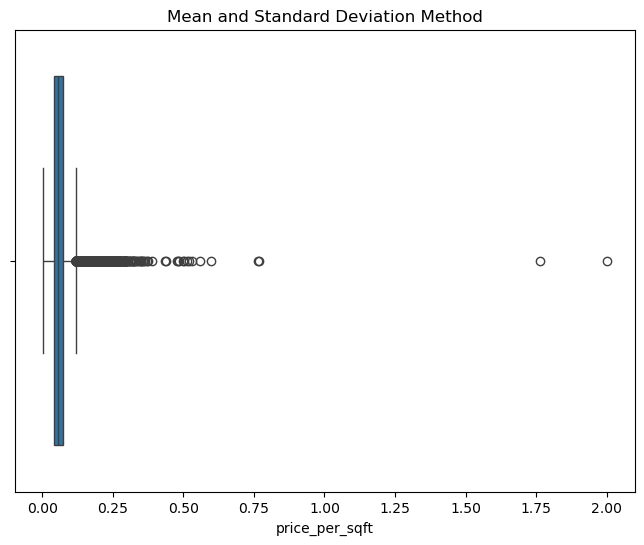

In [58]:
# b)box plot after Mean and Standard Deviation method
plt.figure(figsize=(8,6))
snc.boxplot(x=df_mean_std['price_per_sqft'])
plt.title("Mean and Standard Deviation Method")
plt.show()

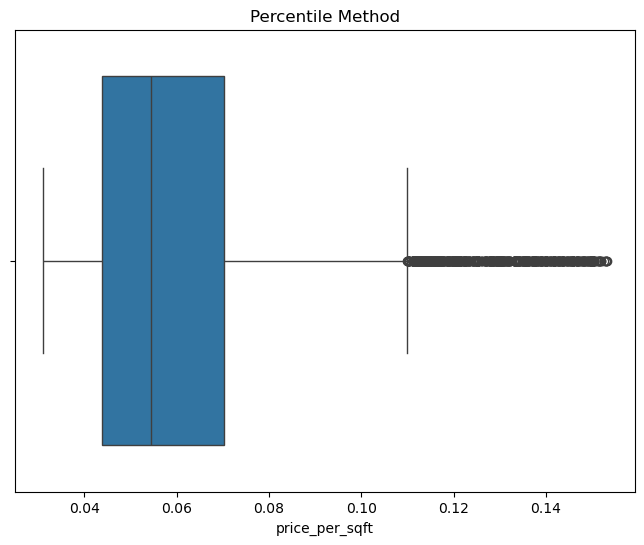

In [60]:
# b)boxplot after  after Percentile Method
plt.figure(figsize=(8,6))
snc.boxplot(x=df_percentile['price_per_sqft'])
plt.title("Percentile Method")
plt.show()

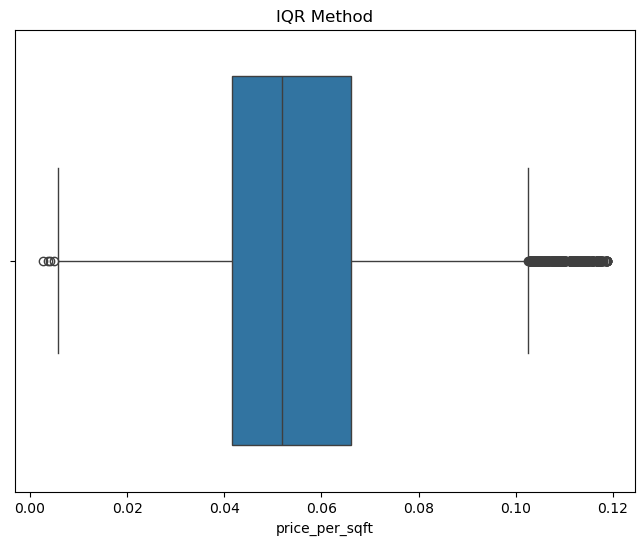

In [62]:
# c)box plot after iqr method
plt.figure(figsize=(8,6))
snc.boxplot(x=df_iqr['price_per_sqft'])
plt.title("IQR Method")
plt.show()

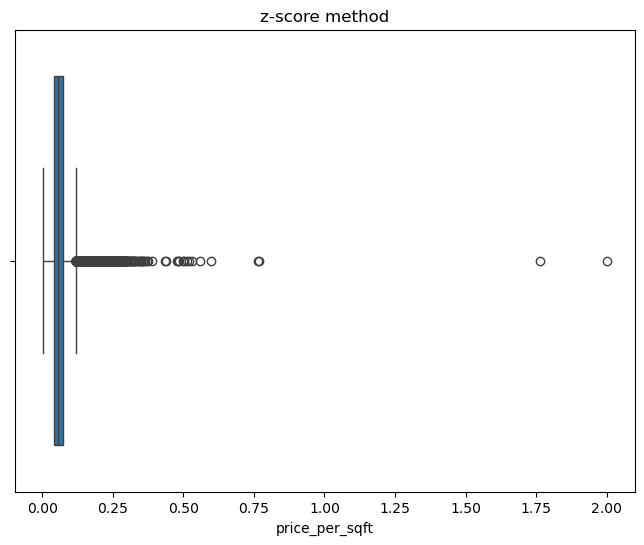

In [64]:
# d)boxplot after z-score method
plt.figure(figsize=(8,6))
snc.boxplot(x=df_zscore['price_per_sqft'])
plt.title("z-score method")
plt.show()

In [ ]:
#  IQR method  seems to work best to remove outliers for this data

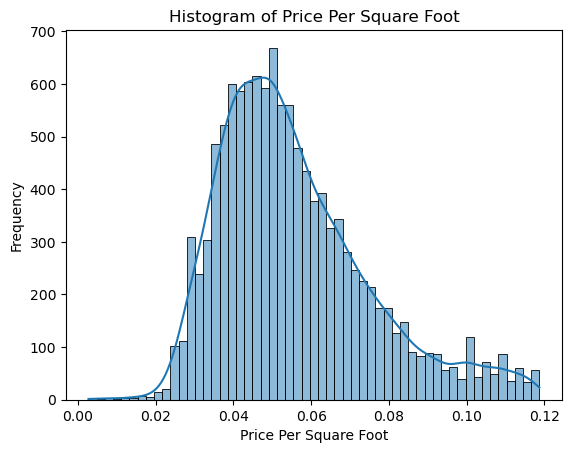

In [66]:
# Q4:Skewness and kurtosis
# histogram to visualize the distribution of the price_per_sqft column
snc.histplot(df_iqr['price_per_sqft'],kde=True)
plt.title('Histogram of Price Per Square Foot')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.show()

In [68]:
# Skewness and Kurtosis
from scipy.stats import skew,kurtosis
original_skew=skew(df_iqr['price_per_sqft'])
original_kurtosis=kurtosis(df_iqr['price_per_sqft'])

print(f" Skewness={original_skew}")
print(f" Kurtosis={original_kurtosis}")

 Skewness=0.9445376396233602
 Kurtosis=0.6783604710796061


In [ ]:
# from the skewness and kutosis value ,it is  moderate right skewness, a log transformation would likely be the most suitable. It tends to be effective in reducing right skewness and making the data more normally distributed.

In [74]:
# Log Transformation:
df_iqr.loc[:,'price_per_sqft_log'] = np.log(df_iqr['price_per_sqft'])

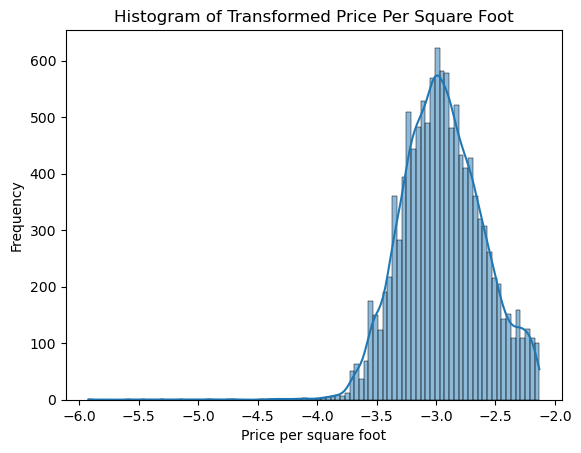

In [78]:
# histogram after transformation'
snc.histplot(df_iqr['price_per_sqft_log'],kde=True)
plt.title('Histogram of Transformed Price Per Square Foot')
plt.xlabel("Price per square foot")
plt.ylabel("Frequency")
plt.show()


In [80]:
# skewness and kurtosis value after transformation
new_skewness=skew(df_iqr['price_per_sqft_log'])
new_kurtosis=kurtosis(df_iqr['price_per_sqft_log'])
print(f"new skewness={new_skewness}")
print(f"new kurtosis={new_kurtosis}")

new skewness=-0.13017087528144045
new kurtosis=1.3382163869792674


In [82]:
# Q5:correlation between all the numerical columns and plot heatmap
# Numerical Columns:
df_iqr.describe()

,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_log
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,1514.629659,2.533641,87.654926,2.644826,0.055764,-2.945268
std,1195.959790,1.111145,73.154677,1.051124,0.019578,0.343696
min,276.000000,1.000000,8.000000,1.000000,0.002678,-5.922574
25%,1100.000000,2.000000,48.000000,2.000000,0.041667,-3.178054
50%,1270.000000,2.000000,66.780000,2.000000,0.051887,-2.958691
75%,1634.500000,3.000000,100.000000,3.000000,0.066033,-2.717594
max,52272.000000,27.000000,2100.000000,27.000000,0.118750,-2.130735


In [86]:
numerical_columns=df_iqr.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns=",numerical_columns)

Numerical columns= ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft', 'price_per_sqft_log']


In [88]:
# Correlation Matrix
correlation_matrix=df_iqr[numerical_columns].corr()
print(correlation_matrix)

                    total_sqft      bath     price       bhk  price_per_sqft  \
total_sqft            1.000000  0.455416  0.660443  0.426239        0.136415   
bath                  0.455416  1.000000  0.571890  0.881677        0.348668   
price                 0.660443  0.571890  1.000000  0.501315        0.612102   
bhk                   0.426239  0.881677  0.501315  1.000000        0.303217   
price_per_sqft        0.136415  0.348668  0.612102  0.303217        1.000000   
price_per_sqft_log    0.057138  0.320132  0.573681  0.270807        0.970172   

                    price_per_sqft_log  
total_sqft                    0.057138  
bath                          0.320132  
price                         0.573681  
bhk                           0.270807  
price_per_sqft                0.970172  
price_per_sqft_log            1.000000  


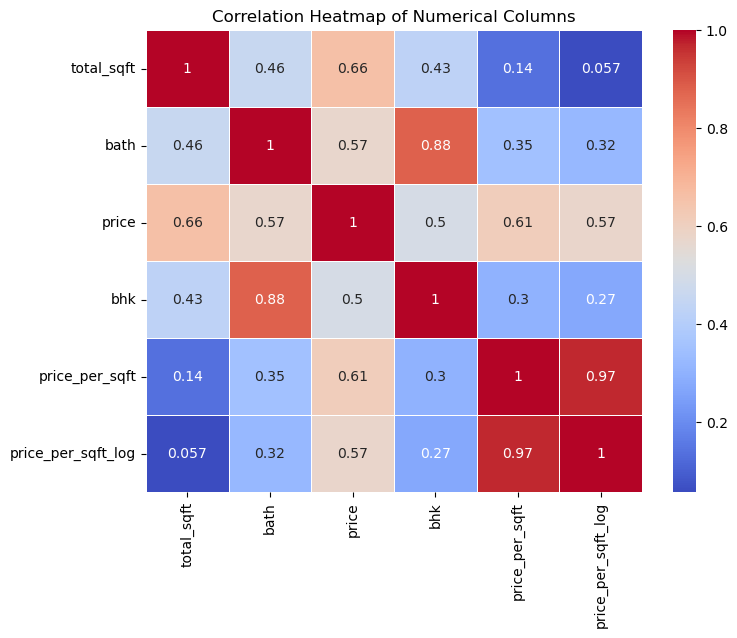

In [90]:
# Heatmap
plt.figure(figsize=(8,6))
snc.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


In [ ]:
# Q6: Draw Scatter plot between the variables to check the correlation between them. 


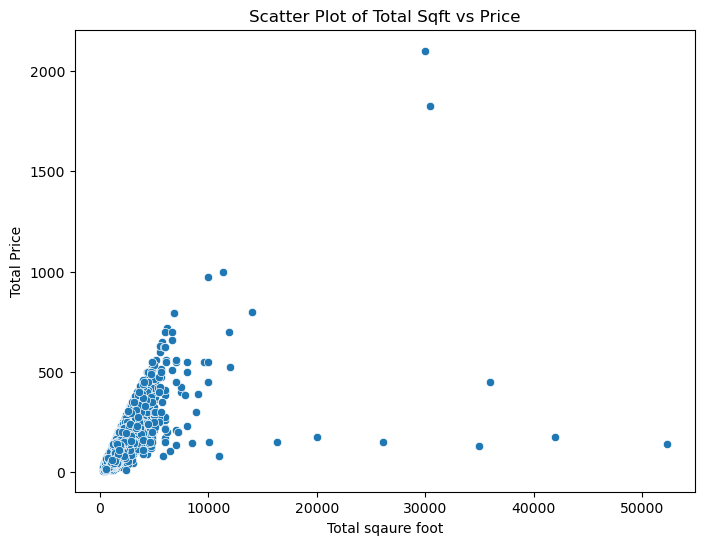

In [92]:
# Scatter plot between `total_sqft` and `price`
plt.figure(figsize=(8,6))
snc.scatterplot(x='total_sqft',y='price',data=df_iqr)
plt.title('Scatter Plot of Total Sqft vs Price')
plt.xlabel("Total sqaure foot")
plt.ylabel("Total Price")
plt.show()

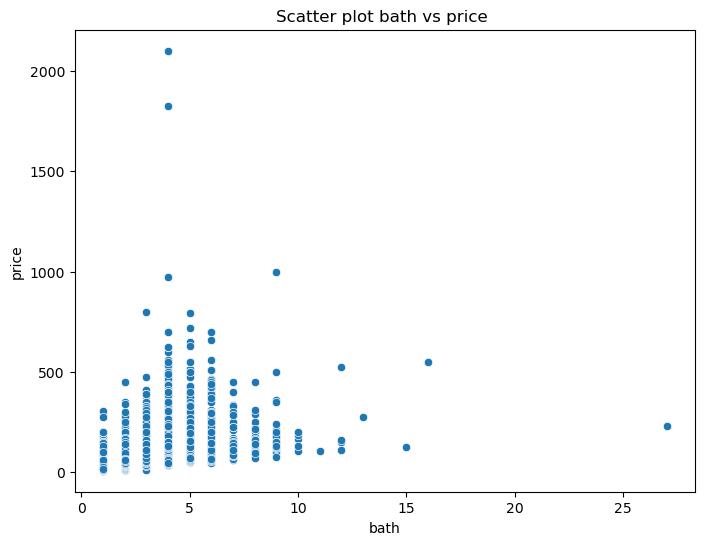

In [96]:
# scatter plot between bath and price
plt.figure(figsize=(8,6))
snc.scatterplot(x='bath',y='price',data=df_iqr)
plt.title("Scatter plot bath vs price ")
plt.xlabel("bath")
plt.ylabel("price")
plt.show()

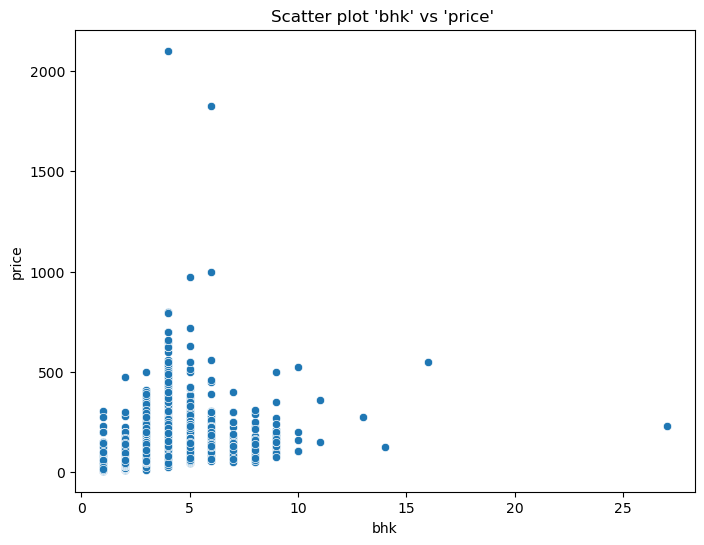

In [98]:
# scatter plot between bhk and price
plt.figure(figsize=(8,6))
snc.scatterplot(x='bhk',y='price',data=df_iqr)
plt.title("Scatter plot 'bhk' vs 'price' ")
plt.xlabel("bhk")
plt.ylabel("price")
plt.show()

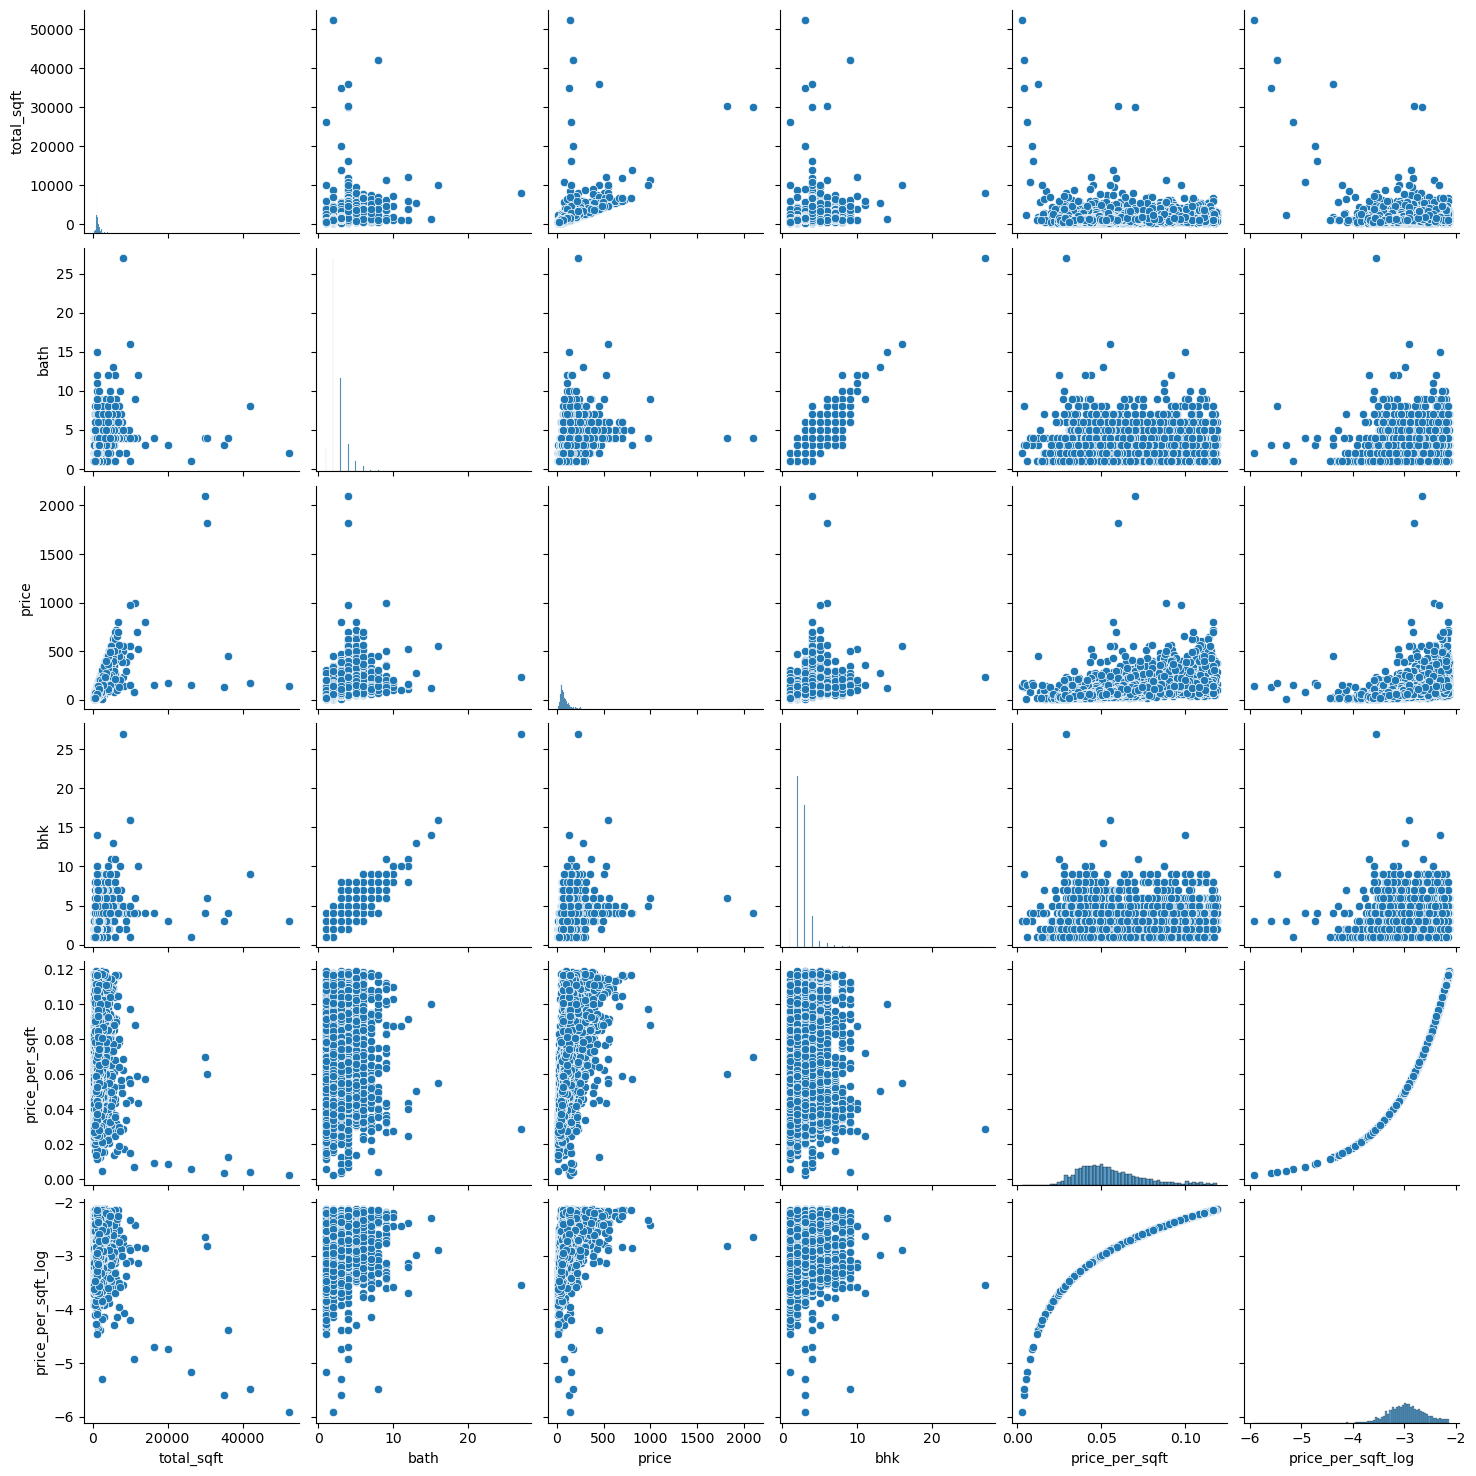

In [105]:
# scatter plot using pairplot
snc.pairplot(df_iqr,vars=numerical_columns)
plt.show()
